# Atividade 3 
## Grupo 3

In [32]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

df = pd.read_excel('2025 2ºsem M109 Cell Phone Dependence Scale-2.xlsx')
df.columns = df.columns.str.strip()
df.head()

,ID,Sexo:,Idade (anos):,Peso (kg):,Altura (m):,Coluna1,Curso:,Período:,Turno de estudo:,Faz alguma atividade extraclasse. se sim qual (is)?,...,13- Com que frequência você se mantém conectado ao celular quando está com amigos ou família?,Pontos 13,14- Com que frequência você se sente sozinho se não participa de redes sociais ou quando não está em grupo enquanto outros estão?,Pontos 14,15- Quantas vezes você mantém na agenda do celular o número de um médico. psicólogo ou hospital por medo de se sentir mal na rua?,Pontos 15,16- Com que frequência você toca no celular?,Pontos 16,Pontuação final,Classificação
0,5,Masculino,20,85,1.82,25.661152,Engenharia de Computação,P6,Integral,Trabalho ;,...,Nunca / Raramente,0,Nunca / Raramente,0,Nunca / Raramente,0,Frequentemente,1,5,Leve
1,6,Masculino,19,64,1.90,17.728532,Engenharia de Telecomunicações,P5,Integral,Iniciação Científica ;,...,Nunca / Raramente,0,Nunca / Raramente,0,Nunca / Raramente,0,Frequentemente,1,10,Leve
2,12,Feminino,29,75,1.69,26.259585,Engenharia de Telecomunicações,P6,Noturno,Iniciação Científica ;Estágio ;Trabalho ;,...,Sempre,2,Sempre,2,Frequentemente,1,Sempre,2,29,Grave
3,13,Masculino,21,68,1.80,20.987654,Engenharia de Computação,P6,Noturno,Iniciação Científica ;,...,Frequentemente,1,Frequentemente,1,Nunca / Raramente,0,Sempre,2,23,Grave
4,26,Masculino,20,64,1.69,22.408179,Engenharia de Software,P5,Integral,Monitoria ;,...,Frequentemente,1,Nunca / Raramente,0,Nunca / Raramente,0,Sempre,2,16,Moderado


In [33]:
# Criar dataframe filtrado apenas com alunos dos períodos P5 e P6
df_silver = df[df['Período:'].isin(['P5', 'P6'])].copy()

print(f"Total de alunos nos períodos P5 e P6: {len(df_silver)}")

# Mostrar as primeiras linhas do dataframe filtrado
print(f"\nPrimeiras 5 linhas do df_silver:")
df_silver.head()


Total de alunos nos períodos P5 e P6: 45

Primeiras 5 linhas do df_silver:


,ID,Sexo:,Idade (anos):,Peso (kg):,Altura (m):,Coluna1,Curso:,Período:,Turno de estudo:,Faz alguma atividade extraclasse. se sim qual (is)?,...,13- Com que frequência você se mantém conectado ao celular quando está com amigos ou família?,Pontos 13,14- Com que frequência você se sente sozinho se não participa de redes sociais ou quando não está em grupo enquanto outros estão?,Pontos 14,15- Quantas vezes você mantém na agenda do celular o número de um médico. psicólogo ou hospital por medo de se sentir mal na rua?,Pontos 15,16- Com que frequência você toca no celular?,Pontos 16,Pontuação final,Classificação
0,5,Masculino,20,85,1.82,25.661152,Engenharia de Computação,P6,Integral,Trabalho ;,...,Nunca / Raramente,0,Nunca / Raramente,0,Nunca / Raramente,0,Frequentemente,1,5,Leve
1,6,Masculino,19,64,1.90,17.728532,Engenharia de Telecomunicações,P5,Integral,Iniciação Científica ;,...,Nunca / Raramente,0,Nunca / Raramente,0,Nunca / Raramente,0,Frequentemente,1,10,Leve
2,12,Feminino,29,75,1.69,26.259585,Engenharia de Telecomunicações,P6,Noturno,Iniciação Científica ;Estágio ;Trabalho ;,...,Sempre,2,Sempre,2,Frequentemente,1,Sempre,2,29,Grave
3,13,Masculino,21,68,1.80,20.987654,Engenharia de Computação,P6,Noturno,Iniciação Científica ;,...,Frequentemente,1,Frequentemente,1,Nunca / Raramente,0,Sempre,2,23,Grave
4,26,Masculino,20,64,1.69,22.408179,Engenharia de Software,P5,Integral,Monitoria ;,...,Frequentemente,1,Nunca / Raramente,0,Nunca / Raramente,0,Sempre,2,16,Moderado


# 1/2 ) Inserir coluna na planilha e, do lado direito da altura e nomear com IMC 

In [34]:
#inserir coluna com IMC ao lado direito da altura
posicao_IMC = df.columns.get_loc('Altura (m):') + 1
df_silver.insert(loc=posicao_IMC, column= 'IMC', value= df_silver['Peso (kg):'] / (df_silver['Altura (m):'] ** 2))

#exibir as primeiras linhas do dataframe
df_silver.head()
df_silver.to_excel("q1-q2.xlsx", index=False)

In [35]:
df_silver.head()

,ID,Sexo:,Idade (anos):,Peso (kg):,Altura (m):,IMC,Coluna1,Curso:,Período:,Turno de estudo:,...,13- Com que frequência você se mantém conectado ao celular quando está com amigos ou família?,Pontos 13,14- Com que frequência você se sente sozinho se não participa de redes sociais ou quando não está em grupo enquanto outros estão?,Pontos 14,15- Quantas vezes você mantém na agenda do celular o número de um médico. psicólogo ou hospital por medo de se sentir mal na rua?,Pontos 15,16- Com que frequência você toca no celular?,Pontos 16,Pontuação final,Classificação
0,5,Masculino,20,85,1.82,25.661152,25.661152,Engenharia de Computação,P6,Integral,...,Nunca / Raramente,0,Nunca / Raramente,0,Nunca / Raramente,0,Frequentemente,1,5,Leve
1,6,Masculino,19,64,1.90,17.728532,17.728532,Engenharia de Telecomunicações,P5,Integral,...,Nunca / Raramente,0,Nunca / Raramente,0,Nunca / Raramente,0,Frequentemente,1,10,Leve
2,12,Feminino,29,75,1.69,26.259585,26.259585,Engenharia de Telecomunicações,P6,Noturno,...,Sempre,2,Sempre,2,Frequentemente,1,Sempre,2,29,Grave
3,13,Masculino,21,68,1.80,20.987654,20.987654,Engenharia de Computação,P6,Noturno,...,Frequentemente,1,Frequentemente,1,Nunca / Raramente,0,Sempre,2,23,Grave
4,26,Masculino,20,64,1.69,22.408179,22.408179,Engenharia de Software,P5,Integral,...,Frequentemente,1,Nunca / Raramente,0,Nunca / Raramente,0,Sempre,2,16,Moderado


# 3) Construa uma tabela de frequências contendo a classificação fa (Quantidade) e fr (Percentual que representa)

In [36]:
#criando classificação 
def classificar(IMC):
    if IMC <= 18.5:
        return "Abaixo do peso"
    elif 18.5 <= IMC <= 24.9:
        return "Peso Normal"
    elif 25 <= IMC <= 29.9:
        return "Sobrepeso"
    elif 30.0 <= IMC <= 34.9:
        return  "Obesidade Grau I (Leve)"
    elif 35.0 <= IMC <= 39.9:
        return  "Obesidade Grau II (Moderada/Severa)"
    else:  # imc >= 40.0
        return "Obesidade Grau III (Grave/Mórbida)"

    
df_silver["Classificação"] = df_silver["IMC"].apply(classificar)

df_silver.to_excel("q3.xlsx", index=False)
df_silver.head()

,ID,Sexo:,Idade (anos):,Peso (kg):,Altura (m):,IMC,Coluna1,Curso:,Período:,Turno de estudo:,...,13- Com que frequência você se mantém conectado ao celular quando está com amigos ou família?,Pontos 13,14- Com que frequência você se sente sozinho se não participa de redes sociais ou quando não está em grupo enquanto outros estão?,Pontos 14,15- Quantas vezes você mantém na agenda do celular o número de um médico. psicólogo ou hospital por medo de se sentir mal na rua?,Pontos 15,16- Com que frequência você toca no celular?,Pontos 16,Pontuação final,Classificação
0,5,Masculino,20,85,1.82,25.661152,25.661152,Engenharia de Computação,P6,Integral,...,Nunca / Raramente,0,Nunca / Raramente,0,Nunca / Raramente,0,Frequentemente,1,5,Sobrepeso
1,6,Masculino,19,64,1.90,17.728532,17.728532,Engenharia de Telecomunicações,P5,Integral,...,Nunca / Raramente,0,Nunca / Raramente,0,Nunca / Raramente,0,Frequentemente,1,10,Abaixo do peso
2,12,Feminino,29,75,1.69,26.259585,26.259585,Engenharia de Telecomunicações,P6,Noturno,...,Sempre,2,Sempre,2,Frequentemente,1,Sempre,2,29,Sobrepeso
3,13,Masculino,21,68,1.80,20.987654,20.987654,Engenharia de Computação,P6,Noturno,...,Frequentemente,1,Frequentemente,1,Nunca / Raramente,0,Sempre,2,23,Peso Normal
4,26,Masculino,20,64,1.69,22.408179,22.408179,Engenharia de Software,P5,Integral,...,Frequentemente,1,Nunca / Raramente,0,Nunca / Raramente,0,Sempre,2,16,Peso Normal


### Criando tabela 


In [37]:
freq = df_silver["Classificação"].value_counts().reset_index()
freq.columns = ["Classificação", "Fa (Quantidade)"]

ordem = ["Abaixo do peso", "Peso Normal", "Sobrepeso","Obesidade Grau I (Leve)", "Obesidade Grau II (Moderada/Severa)", "Obesidade Grau III (Grave/Mórbida)"]
freq["Classificação"] = pd.Categorical(freq["Classificação"], categories=ordem, ordered=True)
freq = freq.sort_values("Classificação")

# Calcular Fr (percentual)
total = freq["Fa (Quantidade)"].sum()
freq["Fr (%)"] = (freq["Fa (Quantidade)"] / total * 100).round(2)

# Adicionar linha de total
linha_total = pd.DataFrame([{
    "Classificação": "Total",
    "Fa (Quantidade)": total,
    "Fr (%)": 100.0
}])

freq = pd.concat([freq, linha_total], ignore_index=True)

# Salvar tabela no Excel
freq.to_excel("tabela_frequencias.xlsx", index=False)
freq.head()

,Classificação,Fa (Quantidade),Fr (%)
0,Abaixo do peso,5,11.11
1,Peso Normal,21,46.67
2,Sobrepeso,17,37.78
3,Obesidade Grau I (Leve),1,2.22
4,Obesidade Grau II (Moderada/Severa),1,2.22


# 4) Criar histograma 

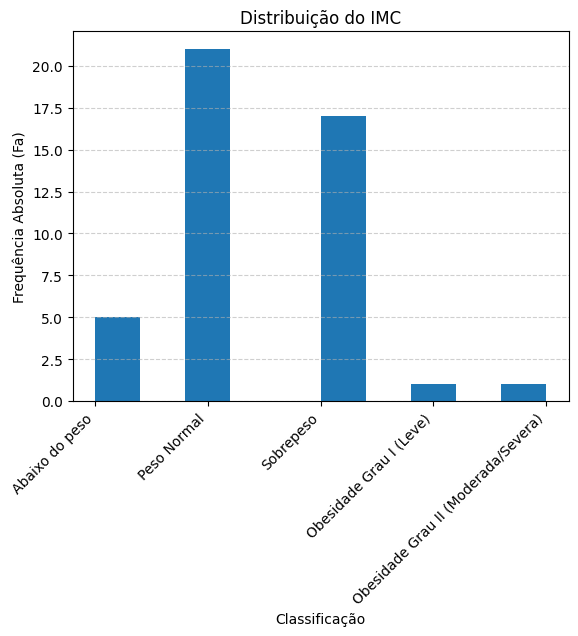

In [38]:
dados_brutos = np.concatenate([
    np.repeat('Abaixo do peso', 5),
    np.repeat('Peso Normal', 21),
    np.repeat('Sobrepeso', 17),
    np.repeat('Obesidade Grau I (Leve)', 1),
    np.repeat('Obesidade Grau II (Moderada/Severa)', 1)
])
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.xlabel("Classificação")
plt.ylabel("Frequência Absoluta (Fa)")
plt.title("Distribuição do IMC")
plt.xticks(rotation=45, ha='right')

plt.hist(dados_brutos)
plt.savefig('distribuicao_imc.png')
plt.show()

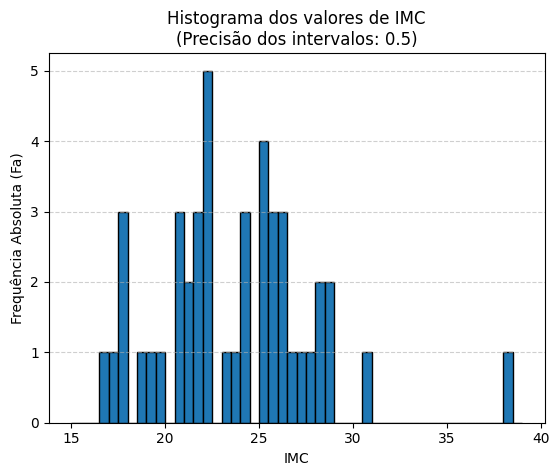

In [39]:
# Definindo os limites dos bins
inicio = 15# número redondo próximo ao mínimo do IMC
fim = np.ceil(df_silver['IMC'].max()) + 0.5  # garante que o maior valor seja incluído
bins = np.arange(inicio, fim, 0.5)

plt.hist(df_silver['IMC'], bins=bins, edgecolor='black')
plt.xlabel('IMC')
plt.ylabel('Frequência Absoluta (Fa)')
plt.title('Histograma dos valores de IMC\n(Precisão dos intervalos: 0.5)')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.savefig('histograma_imc.png')
plt.show()